# Loan Payback Prediction using Keras

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

#### NOTE: the dataset used is different from the kaggle dataset. It has more scope for feature engineering than the kaggle dataset. Just to explore the methods.

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Project Tasks

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

In [9]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


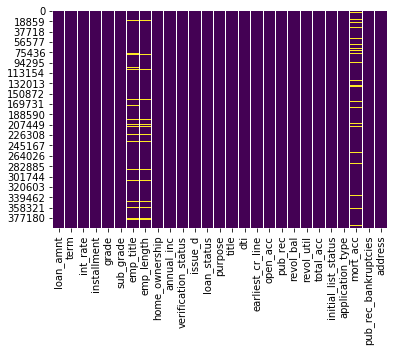

In [10]:
#visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

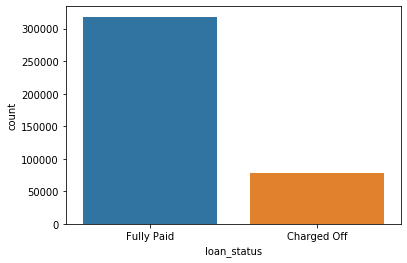

In [11]:
sns.countplot(df['loan_status'])

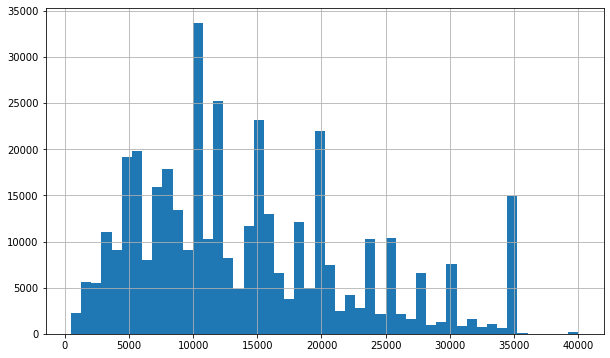

In [12]:
plt.figure(figsize=(10,6))
df['loan_amnt'].hist(bins=50)

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


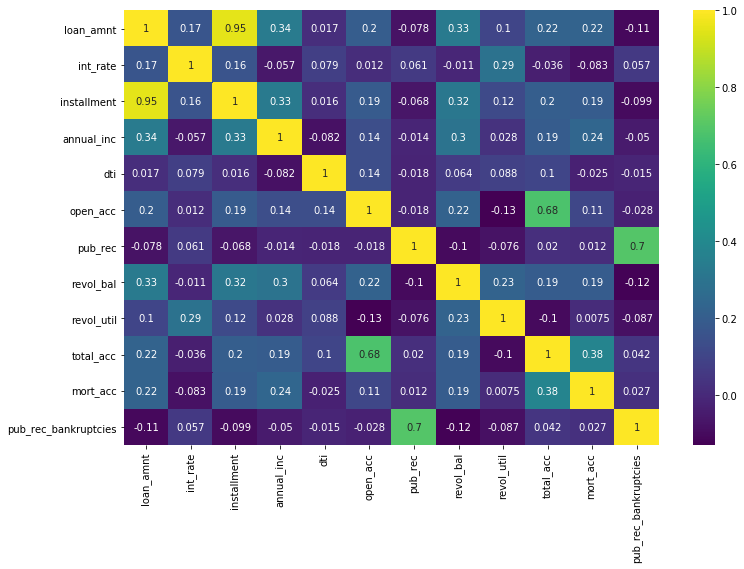

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis' )

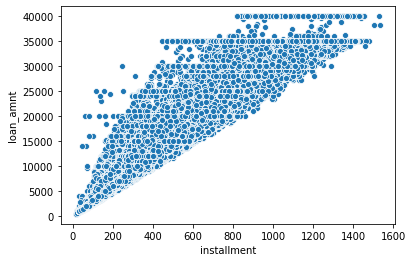

In [15]:
sns.scatterplot(x='installment', y='loan_amnt', data=df)

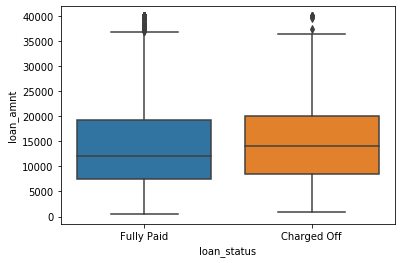

In [16]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [17]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [18]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [19]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [20]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

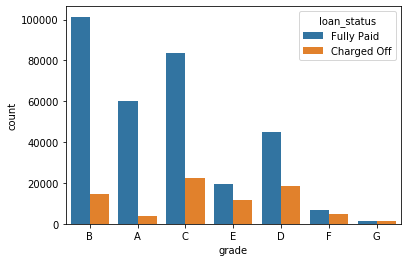

In [21]:
sns.countplot(df['grade'], hue='loan_status', data=df)

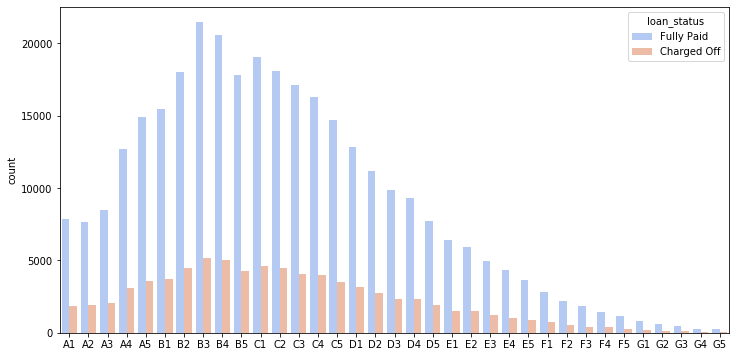

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(sorted(df['sub_grade']), palette='coolwarm' , hue='loan_status', data=df)

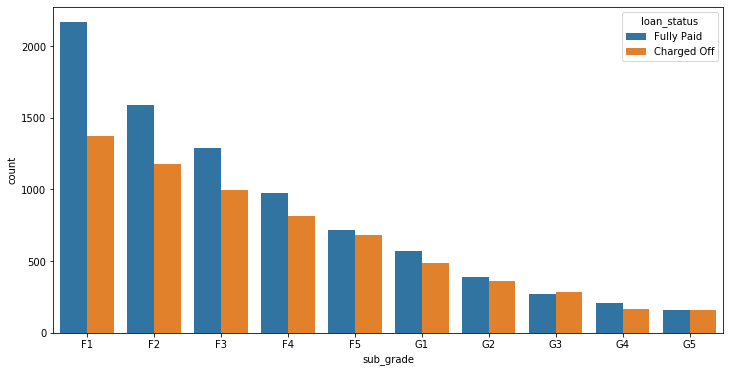

In [23]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,6))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

In [24]:
df['loan_repaid'] =df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

In [25]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


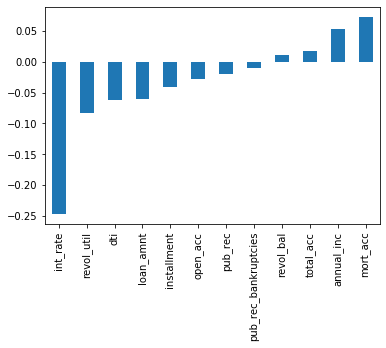

In [26]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [27]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [28]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [29]:
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [30]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [31]:
df.drop('emp_title',axis=1, inplace=True)

In [32]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [33]:
emp_order=[
 '< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

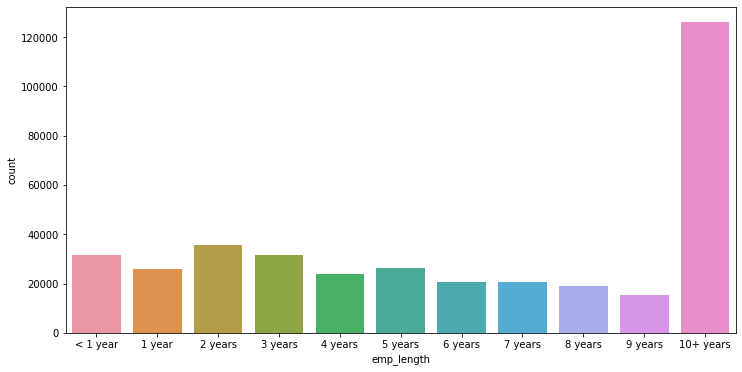

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(df['emp_length'], order=emp_order)

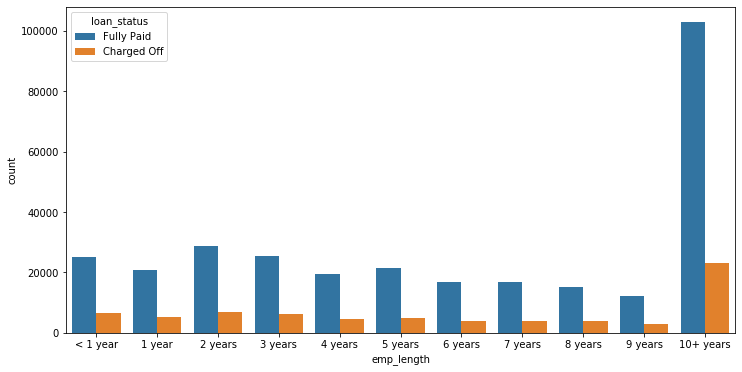

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(df['emp_length'], order=emp_order, hue='loan_status', data=df)

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [36]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [37]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [38]:
emp_len = emp_co/emp_fp

In [39]:
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

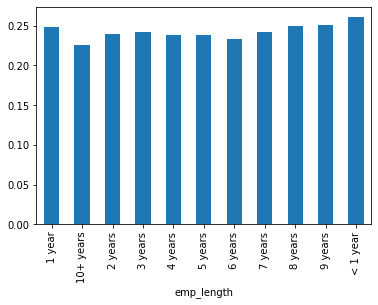

In [40]:
emp_len.plot(kind='bar')

**Review: Charge off rates are extremely similar across all employment lengths. Droping the emp_length column.**

In [41]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [42]:
df.drop('emp_length', axis=1, inplace=True)

**title column vs the purpose column. this is repeated information**

In [43]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. Droping the title column.**

In [44]:
df.drop('title', axis=1, inplace=True)

In [45]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [46]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry.**

In [47]:
print("Mean of mort_acc column per total_acc")
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. **

In [48]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [49]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [50]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data.**

In [51]:
df = df.dropna()

In [52]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

In [53]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

In [54]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [55]:
df['term'] = df['term'].apply(lambda x: int(x[:3]))

### grade feature

**We already know grade is part of sub_grade, so just drop the grade feature.**

In [56]:
df.drop('grade',axis=1, inplace=True)

In [57]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [58]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [59]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 

In [60]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership
**Review the value_counts for the home_ownership column.**

In [61]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. **

In [62]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set.**

In [63]:
df['address'][15][-5:]

'30723'

In [64]:
df['zip_code']=df['address'].apply(lambda x:x[-5:])

In [65]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [66]:
zip_dummies = pd.get_dummies(df['zip_code'], drop_first=True)

In [67]:
df = pd.concat([df,zip_dummies], axis=1)

In [68]:
df.drop(['zip_code', 'address'], axis=1, inplace=True)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [69]:
df.drop('issue_d',axis=1, inplace=True)

### earliest_cr_line
**This appears to be a historical time stamp feature.**

In [70]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))

In [71]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [72]:
df['earliest_cr_year']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 395219, dtype: int64

## Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

**droping the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [74]:
df.drop('loan_status', axis=1, inplace=True)

In [75]:
X = df.drop('loan_repaid', axis=1)
y=df.loan_repaid

In [76]:
#if you want to reduce the training time, uncomment the below line and take a sample of the dataset

# df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**using a MinMaxScaler to normalize the feature data X_train and X_test.**

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [127]:
X_train = scaler.fit_transform(X_train)

In [128]:
X_test=scaler.transform(X_test)

# Creating the Model

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

C:\Users\Mahip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Mahip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Mahip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Mahip\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [113]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [130]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_val, y_val), 
          )

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.4207 - val_loss: 48634.2852
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.3206 - val_loss: 111614.5000
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2981 - val_loss: 197128.0000
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2897 - val_loss: 223825.9844
Epoch 5/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2861 - val_loss: 246420.7969
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2845 - val_loss: 262765.5000
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2840 - val_loss: 282205.5312
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2836 - val_loss: 382505.6875
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2831 - val_loss: 434747.3438
Epoch 10/25
1236/1236 [===============

KeyboardInterrupt: 

In [ ]:
#in case if you want to save your model

#from tensorflow.keras.models import load_model
#model.save('loan_model_Self.h5')

# Section 3: Evaluating Model Performance.

In [88]:
losses = pd.DataFrame(model.history.history)

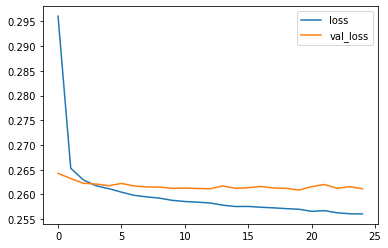

In [89]:
losses.plot()

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [92]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [93]:
print(confusion_matrix(y_test, predictions))

[[ 6789  8869]
 [   60 63326]]


# Adding Callback

#### Accuracy is not a good parameter to judge our model in this case as the classes' representation are highly unbalanced. We should be looking towards F1 Score.

In [99]:
# creating new model as we don't want to train again on the same model

model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [101]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [102]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
9881/9881 [==============================] - 15s 2ms/step - loss: 0.2752 - val_loss: 0.2662
Epoch 2/600
9881/9881 [==============================] - 15s 2ms/step - loss: 0.2628 - val_loss: 0.2625
Epoch 3/600
9881/9881 [==============================] - 15s 2ms/step - loss: 0.2618 - val_loss: 0.2632
Epoch 4/600
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2614 - val_loss: 0.2620
Epoch 5/600
9881/9881 [==============================] - 15s 2ms/step - loss: 0.2610 - val_loss: 0.2623
Epoch 6/600
9881/9881 [==============================] - 15s 1ms/step - loss: 0.2607 - val_loss: 0.2620
Epoch 7/600
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2603 - val_loss: 0.2627
Epoch 8/600
9881/9881 [==============================] - 15s 2ms/step - loss: 0.2602 - val_loss: 0.2619
Epoch 9/600
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2598 - val_loss: 0.2619
Epoch 10/600
9881/9881 [==============================] - 15s 2m

## Examining our model's performance after early callback

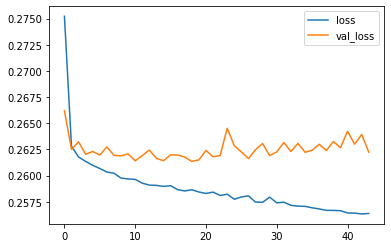

In [103]:

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [104]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 7141  8517]
 [  314 63072]]
              precision    recall  f1-score   support

           0       0.96      0.46      0.62     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.73      0.78     79044
weighted avg       0.90      0.89      0.87     79044



#### The F1 scored Improved but a very little bit. Let's try and tune parameters and layers for better performance.

## Tuning parameters to improve performance

This takes a lot of computation time especially if you not running on a powerful hardware or server instance. Remember to reduce the number of testing parameters if you struggle with testing time. Since I have a GPU powered hardware, I am going to test the maximum parameters I can. Use priori knowledge and already conducted experiments on similar data to reduce the number of parameter testing.

### 1. Tuning Batch Size and Number of epochs

The batch size in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

The number of epochs is the number of times that the entire training dataset is shown to the network during training. Some networks are sensitive to the batch size, such as LSTM recurrent neural networks and Convolutional Neural Networks

In [83]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [156]:
def make_model(optimizer = 'adam'):
    model = Sequential()

    model.add(Dense(78,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(39,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(19,activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
    

In [143]:
model = KerasClassifier(build_fn=make_model, verbose=0)

In [144]:
# define the grid search parameters
batch_size = [32, 64, 128, 256]
epochs = [10, 50, 100]

In [145]:
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [146]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888489 using {'batch_size': 32, 'epochs': 10}
0.888489 (0.001126) with: {'batch_size': 32, 'epochs': 10}
0.888486 (0.001112) with: {'batch_size': 32, 'epochs': 50}
0.888204 (0.001024) with: {'batch_size': 32, 'epochs': 100}
0.888432 (0.000980) with: {'batch_size': 64, 'epochs': 10}
0.888375 (0.000993) with: {'batch_size': 64, 'epochs': 50}
0.888002 (0.000894) with: {'batch_size': 64, 'epochs': 100}
0.888457 (0.001046) with: {'batch_size': 128, 'epochs': 10}
0.888309 (0.000831) with: {'batch_size': 128, 'epochs': 50}
0.887967 (0.001178) with: {'batch_size': 128, 'epochs': 100}
0.888347 (0.000965) with: {'batch_size': 256, 'epochs': 10}
0.888242 (0.000962) with: {'batch_size': 256, 'epochs': 50}
0.888271 (0.000933) with: {'batch_size': 256, 'epochs': 100}


#### Looks like the best batch size is 32 and best epoch is 10. I'll still increase the epochs later and put a callback with tuned parameters. For now I'll go on with 10 epochs.

### 2. Tuning Training optimization algorithm



In [158]:
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=1)

In [159]:
# Testing with a bunch of optimizers
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [160]:
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.3550 - accuracy: 0.8581
Epoch 2/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2795 - accuracy: 0.8869
Epoch 3/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2705 - accuracy: 0.8874
Epoch 4/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2679 - accuracy: 0.8875
Epoch 5/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2662 - accuracy: 0.8875
Epoch 6/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2653 - accuracy: 0.8875
Epoch 7/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2646 - accuracy: 0.8875
Epoch 8/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2640 - accuracy: 0.8876
Epoch 9/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2634 - accuracy: 0.8878
Epoch 10/10
9881/9881 [==============================] - 12s 1ms/step - l

In [161]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888511 using {'optimizer': 'SGD'}
0.888511 (0.001103) with: {'optimizer': 'SGD'}
0.888356 (0.000970) with: {'optimizer': 'RMSprop'}
0.888432 (0.000923) with: {'optimizer': 'Adagrad'}
0.804333 (0.000698) with: {'optimizer': 'Adadelta'}
0.888423 (0.000938) with: {'optimizer': 'Adam'}
0.888432 (0.001042) with: {'optimizer': 'Adamax'}
0.888426 (0.001038) with: {'optimizer': 'Nadam'}


#### The best optimizer for this problem would be the SGD.

### 3. Tuning Learning Rate and Momentum

Learning rate controls how much to update the weight at the end of each batch and the momentum controls how much to let the previous update influence the current weight update.

We will try a suite of small standard learning rates and a momentum values from 0.2 to 0.8 in steps of 0.2, as well as 0.9 (because it can be a popular value in practice).

Generally, it is a good idea to also include the number of epochs in an optimization like this as there is a dependency between the amount of learning per batch (learning rate), the number of updates per epoch (batch size) and the number of epochs.

In [89]:
from tensorflow.keras.optimizers import SGD

In [176]:
def make_model(learn_rate=0.01, momentum=0):
    model = Sequential()

    model.add(Dense(78,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(39,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(19,activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1,activation='sigmoid'))
    
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model
    

In [177]:
# create model
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=1)

In [178]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]

In [179]:
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.3142 - accuracy: 0.8735
Epoch 2/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2698 - accuracy: 0.8873
Epoch 3/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2664 - accuracy: 0.8873
Epoch 4/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2649 - accuracy: 0.8876
Epoch 5/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2641 - accuracy: 0.8877
Epoch 6/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2632 - accuracy: 0.8876
Epoch 7/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2633 - accuracy: 0.8875
Epoch 8/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2628 - accuracy: 0.8876 0s - loss: 0.2625 - accura
Epoch 9/10
9881/9881 [==============================] - 12s 1ms/step - loss: 0.2625 - accuracy: 0.8877
Epoch 10/10
9881/9881 [=======================

In [180]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888432 using {'learn_rate': 0.01, 'momentum': 0.6}
0.887951 (0.000852) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.887980 (0.001140) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.888239 (0.000949) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.888324 (0.001030) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.888318 (0.000942) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.888375 (0.000935) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.888347 (0.000967) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.888388 (0.000970) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.888410 (0.000897) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.888432 (0.000964) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.888397 (0.000977) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.888388 (0.000954) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.888378 (0.000969) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.888381 (0.000976) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.888400 (0.000982) with: {'learn_rate': 

##### Best: 0.888432 using {'learn_rate': 0.01, 'momentum': 0.6}

### Tuning Network Weight Initialization

Neural network weight initialization used to be simple: use small random values.

Now there is a suite of different techniques to choose from.

We will use the same weight initialization method on each layer. Ideally, it may be better to use different weight initialization schemes according to the activation function used on each layer.

In [86]:
def make_model(init_mode='uniform'):
    model = Sequential()

    model.add(Dense(78,kernel_initializer=init_mode,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(39,kernel_initializer=init_mode,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(19,kernel_initializer=init_mode,activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(1,kernel_initializer=init_mode,activation='sigmoid'))
    
    optimizer = SGD(lr=0.01, momentum=0.6)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [87]:
# create model
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=1)

In [88]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
316175/316175 [==============================] - 14s 43us/sample - loss: 0.4112 - acc: 0.8354
Epoch 2/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2695 - acc: 0.8871
Epoch 3/10
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2647 - acc: 0.8879
Epoch 4/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2635 - acc: 0.8879
Epoch 5/10
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2626 - acc: 0.8882
Epoch 6/10
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2622 - acc: 0.8879
Epoch 7/10
316175/316175 [==============================] - 13s 41us/sample - loss: 0.2616 - acc: 0.8881
Epoch 8/10
316175/316175 [===========================

In [89]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888574 using {'init_mode': 'normal'}
0.888299 (0.001069) with: {'init_mode': 'uniform'}
0.888413 (0.000986) with: {'init_mode': 'lecun_uniform'}
0.888574 (0.001108) with: {'init_mode': 'normal'}
0.804333 (0.000698) with: {'init_mode': 'zero'}
0.888451 (0.001046) with: {'init_mode': 'glorot_normal'}
0.888347 (0.000946) with: {'init_mode': 'glorot_uniform'}
0.888381 (0.000950) with: {'init_mode': 'he_normal'}
0.888394 (0.000940) with: {'init_mode': 'he_uniform'}


We can see that the best results were achieved with a normal weight initialization scheme achieving a performance of about 88%.

### 4. Tuning the Neuron Activation Function



The activation function controls the non-linearity of individual neurons and when to fire.

Generally, the rectifier activation function is the most popular, but it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems.

we will evaluate the suite of different activation functions available in Keras. We will only use these functions in the hidden layer, as we require a sigmoid activation function in the output for the binary classification problem.

Generally, it is a good idea to prepare data to the range of the different transfer functions, which we will not do in this case.

In [85]:
def make_model(init_mode='normal', activation='relu'):
    model = Sequential()

    model.add(Dense(78,kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(39,kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(19,kernel_initializer=init_mode,activation=activation))
    model.add(Dropout(0.2))

    model.add(Dense(1,kernel_initializer=init_mode,activation='sigmoid')) #Cannot change this activation function as it is needed for binary classificaiton
    
    optimizer = SGD(lr=0.01, momentum=0.6)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [86]:
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=1)

In [87]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

In [90]:
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
316175/316175 [==============================] - 16s 50us/sample - loss: 0.3235 - acc: 0.8680
Epoch 2/10
316175/316175 [==============================] - 16s 50us/sample - loss: 0.2692 - acc: 0.8861
Epoch 3/10
316175/316175 [==============================] - 16s 51us/sample - loss: 0.2669 - acc: 0.8869
Epoch 4/10
316175/316175 [==============================] - 16s 51us/sample - loss: 0.2657 - acc: 0.8871
Epoch 5/10
316175/316175 [==============================] - 16s 50us/sample - loss: 0.2649 - acc: 0.8871
Epoch 6/10
316175/316175 [==============================] - 16s 50us/sample - loss: 0.2644 - acc: 0.8872
Epoch 7/10
316175/316175 [==============================] - 15s 49us/sample - loss: 0.2640 - acc: 0.8875
Epoch 8/10
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2636 - acc: 0.8875
Epoch 9/10
316175/316175 [==============================] - 16s 50

In [91]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888470 using {'activation': 'linear'}
0.804333 (0.000698) with: {'activation': 'softmax'}
0.888394 (0.000962) with: {'activation': 'softplus'}
0.887572 (0.000422) with: {'activation': 'softsign'}
0.888438 (0.001019) with: {'activation': 'relu'}
0.888419 (0.000884) with: {'activation': 'tanh'}
0.804333 (0.000698) with: {'activation': 'sigmoid'}
0.804333 (0.000698) with: {'activation': 'hard_sigmoid'}
0.888470 (0.001160) with: {'activation': 'linear'}


#### We can see the best activation function is leniear with 88% acc but I'll still be using relu.

The ReLu is a non-linear activation function. There is a very simple reason of why we do not use a linear activation function.

Say you have a feature vector x0 and weight vector W1. Passing through a layer in a Neural Net will give the output as

WT1∗x0=x1
(dot product of weights and input vector). Now passing the output through next layer will give you

WT2∗x1=x2
So expanding this we get

x2=WT2∗WT1∗x0=WT2∗WT1∗x0=WTcompact∗x0

Thus as you can see there is a linear relationship between input and output, and the function we want to model is generally non-linear, and so we cannot model it.

Moreover, there is insignificant difference in accuracy, hence there is no issue I see in using relu.

### 5. Tuning Dropout Regularization

we will look at tuning the dropout rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

To get good results, dropout is best combined with a weight constraint such as the max norm constraint.

This involves fitting both the dropout percentage and the weight constraint. We will try dropout percentages between 0.0 and 0.9 (1.0 does not make sense) and maxnorm weight constraint values between 0 and 5.

In [100]:
from tensorflow.keras.constraints import max_norm

In [104]:
def make_model(init_mode='normal', activation='relu', dropout_rate=0.0, weight_constraint=0):
    model = Sequential()

    model.add(Dense(78,kernel_initializer=init_mode,activation=activation, kernel_constraint=max_norm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(39,kernel_initializer=init_mode,activation=activation, kernel_constraint=max_norm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(19,kernel_initializer=init_mode,activation=activation, kernel_constraint=max_norm(weight_constraint)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1,kernel_initializer=init_mode,activation='sigmoid')) #Cannot change this activation function as it is needed for binary classificaiton
    
    optimizer = SGD(lr=0.01, momentum=0.6)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [105]:
# create model
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=1)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [106]:
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

C:\Users\Mahip\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
316175/316175 [==============================] - 13s 43us/sample - loss: 0.4039 - acc: 0.8362
Epoch 2/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2689 - acc: 0.8865
Epoch 3/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2660 - acc: 0.8871s - loss: 0.2661 -
Epoch 4/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2643 - acc: 0.8874
Epoch 5/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2633 - acc: 0.8875
Epoch 6/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2626 - acc: 0.8880
Epoch 7/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2618 - acc: 0.8880
Epoch 8/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2611 - acc: 0.8884- ETA: 1s - lo
Epoch 9/10
316175/316175 [==============================] - 13s 42us/sample - loss: 0.2609 - acc: 0.8884
Epoch 10/10
316175/3161

In [107]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.888517 using {'dropout_rate': 0.0, 'weight_constraint': 4}
0.887961 (0.001792) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.884719 (0.004700) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.888046 (0.001460) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.888517 (0.000945) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.888204 (0.001014) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.887825 (0.000728) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.888438 (0.001071) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.888492 (0.001086) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.888404 (0.000883) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.887999 (0.001596) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.888340 (0.001073) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.888356 (0.001050) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.888340 (0.000925) with: {'dropout_rate': 0.2, 'weight_constraint': 

#### The best accuracy we got was at dropout 0.0 but there is not much difference between the accuracy in 0.0 and 0.2 dropout rate. So, I'll still use 0.2 dropout rate to minimize the overfitting if there is any.

### Tuning number of neurons in hidden layers

The number of neurons in a layer is an important parameter to tune. Generally the number of neurons in a layer controls the representational capacity of the network, at least at that point in the topology.

Also, generally, a large enough single layer network can approximate any other neural network, at least in theory.

Rule of thumb: if you have one hidden layer, it's always better to have the mean of the number of neurons in first layer and last layer. This gives the best performance. 
But since we have two hidden layers, we are going to set the first hidden layer's neuron as the mean and the second layer will be tested between mean of first and last and mean of first hidden layer and the last layer.

In [111]:
def make_model(neurons , init_mode='normal', activation='relu', dropout_rate=0.2, weight_constraint=4):
    model = Sequential()

    model.add(Dense(78,kernel_initializer=init_mode,activation=activation, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(39, kernel_initializer=init_mode,activation=activation, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons,kernel_initializer=init_mode,activation=activation, kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1,kernel_initializer=init_mode,activation='sigmoid')) #Cannot change this activation function as it is needed for binary classificaiton
    
    optimizer = SGD(lr=0.01, momentum=0.6)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

In [113]:
# create model
model = KerasClassifier(build_fn=make_model, epochs=10, batch_size=32, verbose=1)
# define the grid search parameters
neurons = [19,32]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

Epoch 1/10
316175/316175 [==============================] - 15s 47us/sample - loss: 0.4243 - acc: 0.8304
Epoch 2/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2700 - acc: 0.8875
Epoch 3/10
316175/316175 [==============================] - 15s 46us/sample - loss: 0.2644 - acc: 0.8880
Epoch 4/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2632 - acc: 0.8881
Epoch 5/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2623 - acc: 0.8882
Epoch 6/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2620 - acc: 0.8882
Epoch 7/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2617 - acc: 0.8880s - loss: 0.
Epoch 8/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2612 - acc: 0.8880
Epoch 9/10
316175/316175 [==============================] - 14s 46us/sample - loss: 0.2611 - acc: 0.8882
Epoch 10/10
316175/316175 [================

In [114]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.888442 using {'neurons': 19}
0.888442 (0.001140) with: {'neurons': 19}
0.888407 (0.000932) with: {'neurons': 32}


#### We don't see a lot of difference in the accuracy so we'll go ahead and use 19 neurons in the second layer.

### Increasing the number of epochs with Early Callback and Running it with tuned hyperparameters

In [123]:
#creating the model with tuned parameters
model = Sequential()

model.add(Dense(78,activation='relu', kernel_initializer='normal', kernel_constraint=max_norm(4)))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

optimizer = SGD(lr=0.01, momentum=0.6)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [131]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [141]:
model.fit(x=X_train, y=y_train.values,epochs=600, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Train on 316175 samples, validate on 79044 samples
Epoch 1/600
316175/316175 [==============================] - 17s 54us/sample - loss: 0.3078 - val_loss: 0.2650
Epoch 2/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2658 - val_loss: 0.2653
Epoch 3/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2639 - val_loss: 0.2629
Epoch 4/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2628 - val_loss: 0.2627
Epoch 5/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2624 - val_loss: 0.2627
Epoch 6/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2620 - val_loss: 0.2626
Epoch 7/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2619 - val_loss: 0.2626
Epoch 8/600
316175/316175 [==============================] - 16s 49us/sample - loss: 0.2614 - val_loss: 0.2626
Epoch 9/600
316175/316175 [==============================] - 

Epoch 74/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2575 - val_loss: 0.2618
Epoch 75/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2575 - val_loss: 0.2614
Epoch 76/600
316175/316175 [==============================] - 19s 62us/sample - loss: 0.2575 - val_loss: 0.2618
Epoch 77/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2576 - val_loss: 0.2621
Epoch 78/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2574 - val_loss: 0.2620
Epoch 79/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2574 - val_loss: 0.2619
Epoch 80/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2571 - val_loss: 0.2614
Epoch 81/600
316175/316175 [==============================] - 19s 61us/sample - loss: 0.2573 - val_loss: 0.2619
Epoch 82/600
316175/316175 [==============================] - 19s 62us/sample - loss: 0.2573 - val_loss:

# Evaluation of our final model

In [142]:
losses = pd.DataFrame(model.history.history)

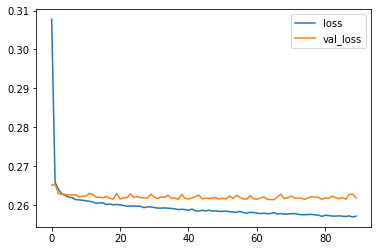

In [143]:
losses.plot()

In [144]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 6807  8851]
 [   77 63309]]
              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

